In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Examples on converting to other formats

In [2]:
from distgen.drivers import run_distgen

import os

In [3]:
beam = run_distgen(inputs='data/rad.gaussian.in.json', verbose=1)

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 10.000 pC.
   Number of macroparticles: 200000.
   r distribution:       Assuming cylindrical symmetry...
   t distribution: uniform
      min_t = -2.000 ps, max_t = 2.000 ps
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Scaling sigma_x -> 2.000 mm
   Shifting avg_x -> 0.000 m
   Scaling sigma_y -> 2.000 mm
   Shifting avg_y -> 0.000 m
   Scaling sigma_px -> 276.857 eV/c
   Shifting avg_px -> 0.000 eV/c
   Scaling sigma_py -> 276.857 eV/c
   Shifting avg_py -> 0.000 eV/c
   Scaling sigma_pz -> 276.857 eV/c
   Shifting avg_pz -> 0.000 eV/c
   Scaling sigma_t -> 1.155 ps
   Shifting avg_t -> 0.000 ps
   Cathode start: fixing pz momenta to forward hemisphere

In [4]:
# convert to simple data
beam.data()

{'n_particle': 200000,
 'species': 'electron',
 'weight': array([5.e-17, 5.e-17, 5.e-17, ..., 5.e-17, 5.e-17, 5.e-17]),
 'status': array([1, 1, 1, ..., 1, 1, 1]),
 'x': array([0.00071868, 0.00257194, 0.00173156, ..., 0.00284179, 0.00197399,
        0.00416432]),
 'y': array([ 3.35742018e-08,  1.72585774e-07,  1.74178935e-07, ...,
        -2.56810092e-07, -1.13017489e-07, -1.19816136e-07]),
 'z': array([0., 0., 0., ..., 0., 0., 0.]),
 'px': array([  99.26592791,  275.35177232, -388.99378245, ..., -483.76379778,
        -195.273881  ,  -41.57557031]),
 'py': array([-271.61650423, -140.30837145,  -35.4755286 , ..., -190.10915399,
         -78.04136937,   22.14982565]),
 'pz': array([1222.99339637, 1180.83056236, 1155.51766702, ..., 1155.51766702,
        1180.83056236, 1222.99339637]),
 't': array([ 1.55559448e-12, -1.85179700e-12, -5.18469896e-13, ...,
         3.78415689e-13,  1.71174279e-12, -1.69564869e-12])}

# openPMD beamphysics data

In [5]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

In [6]:
P = ParticleGroup(data = beam.data())

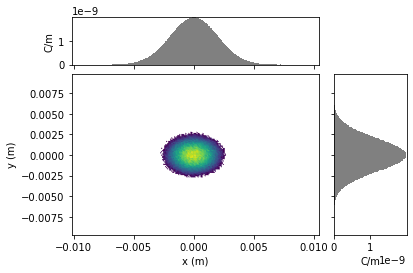

In [7]:
marginal_plot(P, 'x', 'y')

In [8]:
# Resample to fewer particles
P2 = P.resample(10000)

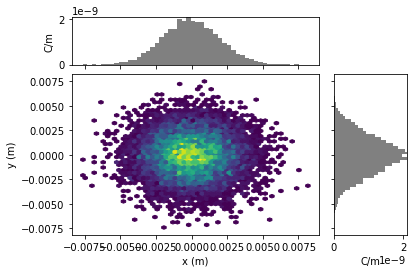

In [9]:
marginal_plot(P2, 'x', 'y')

In [10]:
# Use the ParticleGroup to write to h5
P2.write('distgen_particles.h5')

In [11]:
!pwd

/Users/colwyngulliford/Documents/GitHub/distgen/examples


In [12]:
P2.gamma

array([1.00000023, 1.00000095, 1.00000074, ..., 1.00000105, 1.00000001,
       1.0000004 ])

In [13]:
from h5py import File
with File('distgen_particles.h5', 'r') as h5:
    P3 = ParticleGroup(h5)

In [14]:
P3.gamma

array([1.00000023, 1.00000095, 1.00000074, ..., 1.00000105, 1.00000001,
       1.0000004 ])

In [15]:
# Cleanup
os.remove('distgen_particles.h5')
os.remove('rad.gaussian.out.txt')